In [67]:
#auto-reloading external modules
import autoreload
%load_ext autoreload
%autoreload 2

from layers import *
from RNNs import *
from solver import *
import numpy as np

# Take input text file and output array of integers for each character into variable "data"
data = open('pride.txt', 'r').read() # should be simple plain text file
chars = list(set(data))
data_size, vocab_dim = len(data), len(chars)
print(f'There are {data_size} characters in the dataset, {vocab_dim} of them unique.')
char_to_idx = { ch:i for i,ch in enumerate(chars) }
idx_to_char = { i:ch for i,ch in enumerate(chars) }
data = np.array([char_to_idx[s] for s in data])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data has 773754 characters, 88 unique.


In [126]:
# Instantiate a class of the model we want. There are two cell type options, "lstm" and "vanilla"
# input_dim: the one-hot vector of size vocab_dim to a lower dimensional representation of length input_dim
# hidden_dim: size of the hidden layer
# idx_to_char: unecessary for the actual model, but is convenient to let us convert model output integers to sentences
# seq_length: number of characters for any given instance of the data.
# lr: learning rate. The choice of optimizer is not implemented here, but must be changed in the source code.
# the default is RMSprop. See optim.py for more choices, and solver.train() --> Optimizer for changing source code
# num_iters: number of iterations
# batch_size: mini_batch size for each update. A mini batch comprises 16 successive sequences. 
model = RNN(vocab_dim, idx_to_char, hidden_dim=200, input_dim=len(char_to_idx)//4, cell_type='lstm')
solver = Solver(data, model, seq_length=50, lr=1e-2, num_iters=10000, batch_size = 16)

In [132]:
solver.train()

Iteration 0/10000. Loss = 1.3010630690142597
8mbeen lost recoming consistencent; unecessions or distinred 
None
Iteration 100/10000. Loss = 1.051221598662974
Iteration 200/10000. Loss = 1.0600751368888603
Iteration 300/10000. Loss = 1.1560213110338726
Iteration 400/10000. Loss = 1.1121986218246176
Iteration 500/10000. Loss = 1.2000981000114501
Iteration 600/10000. Loss = 1.1847351099829726
Iteration 700/10000. Loss = 1.1754638830895348
Iteration 800/10000. Loss = 1.214909690858251
Iteration 900/10000. Loss = 1.18774530712927
Iteration 1000/10000. Loss = 1.1868865729535536
s
      the evening are never entirely of these of cannot eno
None
Iteration 1100/10000. Loss = 1.1852020490971542
Iteration 1200/10000. Loss = 1.171311176215531
Iteration 1300/10000. Loss = 1.1245692715206612
Iteration 1400/10000. Loss = 1.2572283324034508
Iteration 1500/10000. Loss = 1.0999758295748998
Iteration 1600/10000. Loss = 1.2309915277863026
Iteration 1700/10000. Loss = 1.145691434655034
Iteration 1800/10000

In [133]:
# After finishing training, make sure to save the model using python's pickle library
import pickle
filehandler = open('model_LSTM_h200_T50_D22.txt', 'wb') 
pickle.dump(model, filehandler)
filehandler = open('solver_LSTM_h200_T50_D22.txt', 'wb') 
pickle.dump(solver, filehandler)

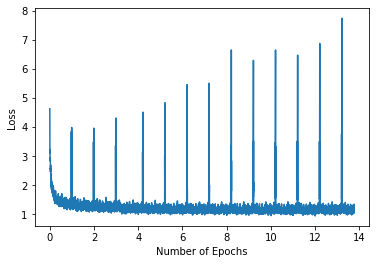

In [134]:
# We can visualize the loss fucntion per number of epochs here. There's clearly a spike once the memory resets!
solver.plot_loss()

In [142]:
# One character is named Elizabeth, so let's see what we get if we start with a sequence with 'E'
print(model.sample(char_to_idx['E'], T=500))

Etrongly followed towards he called in town; and they follay is a most over; writing her remainir. I evidents. Wou delain; but he could be in a strongown, were al an inclination it without some of the received it last othere; or and as I creminy aboom the entreat it you were so frequent remome of all I
      women. The wonal point,
      with
      “And I have been the schemes, who
      preparass
      as they and which her daughter was other desicted. Lady Catherine’s contemplan of have but it 


In [149]:
# Let's see how the sentence complexity changes as we cycle through various values p_power
# for lower p_power, we approach random guessing, at high p_power, the function becomes deterministic
# Always taking the next most likely character
vals = np.power(2,np.arange(-2,3,0.5))
for p in vals:
    print('-'*100)
    print(f"p_power = {p}")
    print(model.sample(char_to_idx['E'], T=200, p_power=p))

----------------------------------------------------------------------------------------------------
p_power = 0.25
Eanmar/  êwne, uaght/ingce,rihiatiorays?” foauryifiaV,—“ —I b -e:w
5bdllIsang Wfuen?5—s’’s,t!poumcee War
pas, paesbio%ildwis.” 'aul.
Ung605iorjmssd;”eps; bucrh) bardEt eo:—3p-wot nato;vawur,.c. liNnigi
----------------------------------------------------------------------------------------------------
p_power = 0.3535533905932738
Eh. Gu
fh theard hi,
 a venfoumm
    uldger ye hours, ebday Jatumeeseffliglaining. k munctiatils. Ladgy’h;
 n   pak@,cane! Tw2ndertimanteac’tfection
eeclork, Gorts atrevatini dinips
   ofronig,ice
 You
----------------------------------------------------------------------------------------------------
p_power = 0.5
Ehf traid that madam.”





r ithe., and watnouchours leadfy, yureld,
      mi?a disglastion,
     tone,
      ceir Catherions.”

      His lifeve thereforepes. !

      When I
      writes there’sa
 y
---------------------------------

In [52]:
import timeit
tic = timeit.timeit()
model = RNN(vocab_dim, idx_to_char, hidden_dim=100, input_dim=len(char_to_idx), cell_type='vanilla')
solver = Solver(data, model,seq_length=25, lr=1e-1, num_iters=10000, batch_size = 1)
solver.train()
toc = timeit.timeit()
print(toc-tic)

Iteration 0/10000. Loss = 5.361850677230633
ObvqiZIz’m)Gy“f-r”qIY3MXMVyfb$s2yV‘m 1g$4X—“kAla7-MccR:éhz0xA
Iteration 100/10000. Loss = 2.9378594484805727
Iteration 200/10000. Loss = 3.144687215316372
Iteration 300/10000. Loss = 2.949261000108381
Iteration 400/10000. Loss = 3.046173469565225
Iteration 500/10000. Loss = 2.6776635434588165
Iteration 600/10000. Loss = 2.519126017735358
Iteration 700/10000. Loss = 2.0190431358370353
Iteration 800/10000. Loss = 3.238781200428043
Iteration 900/10000. Loss = 1.6895747765912217
Iteration 1000/10000. Loss = 2.54560388989432

      was mon mave s se of ange her f hurely wask co wirer i
Iteration 1100/10000. Loss = 1.9082051823583601
Iteration 1200/10000. Loss = 2.2201384173758965
Iteration 1300/10000. Loss = 2.2971806569701596
Iteration 1400/10000. Loss = 2.661411891318998
Iteration 1500/10000. Loss = 1.8063895261103595
Iteration 1600/10000. Loss = 2.4683728898631543
Iteration 1700/10000. Loss = 1.9277046716268926
Iteration 1800/10000. Loss = 2.27